In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Taylor's Theorem

Taylor's Theorem gives an approximation of a $k$-times differentiable function around a given point by a polynomial of degree $k$. This approximation is called the $k$-th-order Taylor Polynomial.

### First-Order Taylor Polynomial
Aka. the linear approximation.

Let $f(x)$ be differentiable at a point $x=a$ and be defined on the reals. Then there exists a linear approximation near this point with some function $h_1(x)$ such that:
$$f(x) = f(a) + f'(a)(x-a) + h_1(x)(x-a), \ \lim_{x\rightarrow a} h_1(x)=0$$
- Written out, the function evaluated at $a$, plus its first derivative times the difference between $x$ and $a$, plus $h_1(x)$ times the difference. The derivative term may be interpreted as the rate of change in the function times the change in the independent variable. 

This is decomposed as:
$$\begin{align*}
& P_1(x) = f(a) + f'(a)(x-a) \\
& R_1(x) = f(x) - P_1(x) = h_1(x)(x-a)
\end{align*} $$
Here, $P_1(x)$ is simply the tangent-line to the function at $a$. So, $h_1(x)(x-a)$ is like a correction for the non-linearity of the function. As $x$ approaches $a$, this term reduces to 0. As $x$ and $a$ diverge, it increases.

#### Example

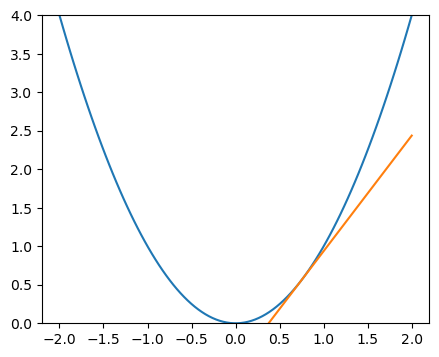

In [13]:
x = np.linspace(-2, 2, 100)
fx = x**2

a = 0.75
p1 = a**2 + 2*a*(x-a)
r1 = fx - p1  # fx = p1 + r1

plt.figure(figsize=(5, 4))
plt.plot(x, fx)
plt.plot(x, p1)
plt.ylim(0, 4);

**Second-Order Taylor Polynomial:**\
aka. the quadratic approximation.

We may improve the approximation by adding a higher order term:
$$
\begin{align*}
& P_2(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2} (x-a)^2 \\
& R_2(x) = f(x) - P_2(x) = h_2(x)(x-a)^2
\end{align*}
$$

This second-order term is sort-of an inclusion of the change-in-the-change. It caputers the change in the change in $f(x)$ evaluated at $a$ as $x$ and $a$ diverge. Note that the nonlinear error term is now of higher order as well.

#### Example

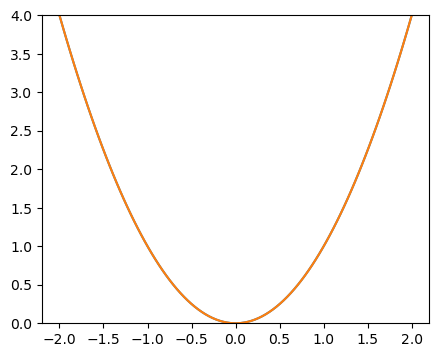

In [14]:
# second order approximation works well for a twice differentiable function

x = np.linspace(-2, 2, 100)
fx = x**2

a = 0.75
p2 = a**2 + 2*a*(x-a) + (x-a)**2

plt.figure(figsize=(5, 4))
plt.plot(x, fx)
plt.plot(x, p2)
plt.ylim(0, 4);

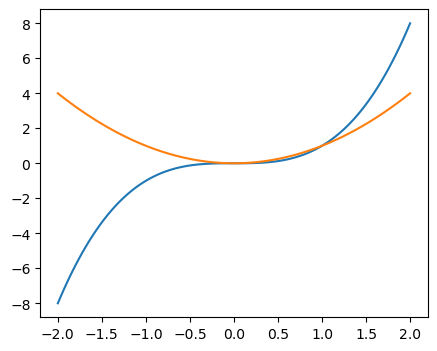

In [17]:
# second order approximation works less well for a thrice differentiable function
ffx = x**3

plt.figure(figsize=(5, 4))
plt.plot(x, ffx)
plt.plot(x, p2);

### General Form

Let $k\ge 1$ be an integer, and the function $f:\reals \rightarrow \reals$ be $k$-times differentiable at the point $a\in \reals$. Then there exists a function $h_k:\reals \rightarrow \reals$ such that:
$$f(x) = \sum_{i=0}^k \frac{f^{(i)}(a)}{i!}(x-a)^i + h_k(x)(x-a)^k, \ \lim_{x\rightarrow a} h_k(x) = 0$$

### Sufficiency of Approximation

There are functions, even infinitely differentiable ones, for which increasing the degree of the approximating polynomial does not increase the accuracy of the approximation. That is, for which the error term $h_k(x)$ is irreducible past some point. These functions are said to be *unanalytic* at $x=a$; i.e., they *are not determined by their derivatives at $a$*

Taylor's Theorem is aymptotic. That is, the error $R_k$ of an approximation by a Taylor polynomial $P_k$ tends to zero faster than any nonzero $k$-degree polynomial, $(x-a)^k$, as $x\rightarrow a$. It *does not* tell us how large the error is within any neighborhood of the function.

So, for the purposes of decomposing changes in a function (e.g. trend analysis) we ought to make sure that the function be examine *is analytic* in order to use Taylor's Theorem.

## Multivariate Application

### Higher-Order Differentiability
A function $f: \reals^n \rightarrow \reals$ is differentiable at $\mathbf{a}\in \reals^n$ if and only if there exists a linear functional $L:\reals^n \rightarrow \reals$ and a function $h:\reals^n \rightarrow \reals$ such that:
$$ f(\mathbf{x}) = f(\mathbf{a}) + L(\mathbf{x - a}) h(\mathbf{x})\|\mathbf{x - a} \|$$
Here, $L = df(\mathbf{a})$ is the uniquely defined differential of $f$ at the point $\mathbf{a}$:
$$df(\mathbf{a}) (\mathbf{v}) = \frac{\partial f}{\partial x_1} (\mathbf{a}) v_1 + \cdots + \frac{\partial f}{\partial x_n} (\mathbf{a}) v_n$$

Let $\bf D$ be the $1\times n$ matrix of first-order partial derivatives. I.e.:
$$\mathbf{D} = \begin{bmatrix} f_{x_1} \ \ \cdots \ \ f_{x_n} \end{bmatrix}$$
Then the differential may be expressed as:
$$df(\mathbf{a})(\mathbf{v}) = \mathbf{Dv}$$
Where the partial derivatives are evaluated at the point $\bf a$

Then, the matrix of second-order partial derivatives is the $n\times n$ Hessian matrix $\bf H$ which we will denote $\mathbf{D}^{(2)}$.

Higher-order derivatives a composed within tensors. For instance, $\mathbf{D}^{(3)}$ is an $n\times n \times n$ tensor. More generally $\mathbf{D}^{(k)}$ is a tensor of shape $n\times \cdots \times n$ $k$ times. This is difficult to express in matrix notation, but fairly straightforward as a sum:
$$D^{\alpha}f = \frac{\partial^{|\alpha|}f}{\partial \mathbf{x}^\alpha} = \frac{\partial^{\alpha_1 \times \cdots \alpha_n}f}{\partial x_1^{\alpha_1} \cdots \partial x_n^{\alpha_n}}$$

**Multivariate Taylor's Theorem:**\
Let $f:\reals^n \rightarrow \reals$ be a $k$-times differentiable function at the point $\mathbf{a}\in\reals^n$, and $|\alpha| = \alpha_1 + \cdots + \alpha_n$. Then there exists functions $h_\alpha : \reals^n\rightarrow\reals$ where $|\alpha | = k$, such that:
$$
f(\mathbf{x}) = \sum_{|\alpha|\le k} \frac{D^\alpha f(\mathbf{a})}{\alpha !} (\mathbf{x-a})^\alpha + \sum_{|\alpha| = k} h_\alpha (\mathbf{x})(\mathbf{x-a})^\alpha, \ \lim_{x\rightarrow a} h_{\alpha} = 0$$

#### Example in Two Dimensions
This example considers a function of two varibales $f(x_1, x_2)$ that is *thrice-differentiable* - thus it has a third-order Taylor polynomial approximation.

Consider $f:\reals^2 \rightarrow \reals$, $f(x_1,x_2)$, that is thrice differentiable with some point $\mathbf{a}\in\reals^2$. Denote $\bf v = x - a$. Then:
$$
\begin{align*}
& P_3(\mathbf{x}) = f(\mathbf{a})  \\
& \ \ \ \ \ \ \ \ \ \ \ \ \ \ + \frac{\partial f}{\partial x_1}(\mathbf{a})v_1 + \frac{\partial f}{\partial x_2}(\mathbf{a})v_2 \\
& \ \ \ \ \ \ \ \ \ \ \ \ \ \ + \frac{1}{2!}\frac{\partial^2 f}{\partial x_1^2}(\mathbf{a})v_1^2 + \frac{2}{2!}\frac{\partial^2 f}{\partial x_1 \partial x_2}(\mathbf{a})v_1v_2 + \frac{1}{2!}\frac{\partial^2 f}{\partial x_2^2}(\mathbf{a})v_2^2 \\
& \ \ \ \ \ \ \ \ \ \ \ \ \ \ + \frac{1}{3!} \frac{\partial^3 f}{\partial x_1^3}(\mathbf{a}) v_1^3 + \frac{3}{3!} \frac{\partial^3 f}{\partial x_1^2x_2}(\mathbf{a}) v_1^2v_2 + \frac{3}{3!}\frac{\partial^3 f}{\partial x_1x_2^2}(\mathbf{a})v_1v_2^2 + \frac{1}{3!} \frac{\partial^3 f}{\partial x_2^3}(\mathbf{a}) v_2^3
\end{align*}
$$

The form is similar when more variables are included (i.e. as the dimension increases).